# Unified Plotting - version for ccpi0 Xsec measurement

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
pi0scaling = {"val": 0, "suffix": "", "title": "No pi0 Scaling"} #no scaling
#pi0scaling = {"val": 1, "suffix": "_pi0flat", "title": "0.759 pi0 Scaling"} #flat scaling
#pi0scaling = {"val": 2, "suffix": "_pi0e040", "title": r"$\pi^0$ scaling: [$1 - 0.40 \times E_\pi$]"} #energy-dependent


In [3]:
from matplotlib import pyplot as plt

params = {
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
plt.rcParams.update(params)

from load_data_run123_Dell import *
from unblinding_far_sideband import *

In [4]:
import sys
import localSettings as ls
print(ls.main_path)
print(ls.ntuple_path)
main_path = ls.main_path
sys.path.append(main_path)

/Users/meghna-local/NoteBooks/xsec/PELEE/
/Users/meghna-local/PELEE_sys/root_files/


In [5]:
import scipy.stats

In [6]:
#which_sideband = ['np_far'       ,"farsideband", 0] # far-sideband 1eNp datasets
#which_sideband = ['0p_far'       ,"farsideband", 0] # far-sideband 1eNp datasets
#which_sideband = ['numu',"numu", 0] # numu NTuples [v41]
which_sideband = ['2plus_showers',"farsideband", 0] # far-sideband 2+ shower datasets
#which_sideband = ['np_sb_comb',"farsideband", 0] # combined far-sideband 1eNp and 2+ shower datasets
#which_sideband = ['opendata'     ,'opendata', 0]    # open datasets (5e19 / 1e19)
#which_sideband = ['opendata'     ,'fakeset9', 9]    # set9=NuWro fake dataset
#which_sideband = ['opendata'     ,'opendata', 0]    # full data

In [ ]:
samples = load_data_run123(which_sideband=which_sideband[0],
                           return_plotter=False,
                           pi0scaling=pi0scaling["val"],
                           loadpi0variables=True,
                           loadtruthfilters=True,
                           loadshowervariables=True,
                           loadnumuntuples=False,
                           loadnumuvariables=False,
                           loadfakedata=which_sideband[2],
                           USEBDT=False,
                           loadeta=False,
                           loadsystematics=True,
                           loadrecoveryvars=False,
                           loadccncpi0vars=True)

Loading uproot files
['shr_pfp_id_v', 'trk_hits_y_tot', 'pi0_e', 'interaction', 'pi0_energy1_U', 'trk_energy', 'secondshower_Y_dot', 'secondshower_U_vtxdist', 'shr_phi', 'trk_llr_pid_score_v', 'reco_nu_vtx_y', 'shr_dedx_Y', 'trk_phi', 'run', 'nu_pdg', 'pi0_shrscore2', 'pi0_mass_V', 'trkshrhitdist2', 'pi0truth_gamma2_etot', 'reco_nu_vtx_x', 'pi0_mass_Y', 'shr_hits_tot', 'shr_tkfit_gap10_nhits_V', 'selected', 'pi0truth_gamma1_dist', 'trk_sce_end_y_v', 'n_tracks_contained', 'shr_bkt_pdg', 'secondshower_Y_dir', 'pi0truth_gamma1_edep', 'secondshower_Y_nhit', 'secondshower_U_dir', 'shr_tkfit_npointsvalid', 'trk_bkt_pdg', 'secondshower_Y_vtxdist', 'shr_bkt_E', 'shr_tkfit_npoints', 'reco_nu_vtx_sce_x', 'npi0', 'shr_dedx_V', 'trk_len', 'pi0_radlen2', 'shr_tkfit_nhits_V', 'shr_score', 'shr_py', 'pion_e', 'true_nu_vtx_x', 'pi0_dot1', 'pi0truth_gamma2_dist', 'backtracked_pdg', 'reco_nu_vtx_z', 'shr_tkfit_dedx_nhits_u_v', 'trk_hits_tot', 'true_nu_vtx_y', 'trk_hits_v_tot', 'shr_theta_v', 'shr_energy

/Users/meghna-local/NoteBooks/xsec/PELEE/load_data_run123_Dell.py:51: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2*e1*e2*(1-px1*px2-py1*py2-pz1*pz2))
/Users/meghna-local/NoteBooks/xsec/PELEE/load_data_run123_Dell.py:51: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(2*e1*e2*(1-px1*px2-py1*py2-pz1*pz2))
/Users/meghna-local/NoteBooks/xsec/PELEE/load_data_run123_Dell.py:1123: RuntimeWarning: invalid value encountered in true_divide
  df['leadPi0_uz'] = leadPi0_pz/np.sqrt(leadPi0_px*leadPi0_px + leadPi0_py*leadPi0_py + leadPi0_pz*leadPi0_pz)
/Users/meghna-local/NoteBooks/xsec/PELEE/load_data_run123_Dell.py:1124: RuntimeWarning: invalid value encountered in sqrt
  df['leadPi0_p'] = np.sqrt(leadPi0_E**2 - 0.13498**2)
/Users/meghna-local/NoteBooks/xsec/PELEE/load_data_run123_Dell.py:1328: RuntimeWarning: invalid value encountered in true_divide
  df['Muon_uz'] = Muon_pz/np.sqrt(Muon_px*Muon_px + Muon_py*Muon_py + Muon_pz*Muon_pz)
/Users/meghna-l

In [11]:
import plotter
import unblinding_far_sideband
import importlib
importlib.reload(plotter)
importlib.reload(unblinding_far_sideband)

<module 'unblinding_far_sideband' from '/Users/meghna-local/NoteBooks/xsec/PELEE/unblinding_far_sideband.py'>

In [13]:
#remove lee from samples!
#del samples['lee']
plotter_runbyrun = {}
for run in [1, 2, 3, 123, 12]:
    this_weights, this_pot = get_weights(run,dataset=which_sideband[1])
    #remove lee from weights too!
    #del this_weights['lee']
    plotter_runbyrun[run] = plotter.Plotter(samples, this_weights, pot=this_pot)
    #print(this_weights,this_pot)
    if (run==123): print(this_weights,this_pot)

{'mc': 0.18692098092643053, 'nue': 0.0035507246376811595, 'lee': 0.0035507246376811595, 'ncpi0': 0.04931703810208483, 'ccpi0': 0.06922300706357215, 'dirt': 0.42848219862585885, 'ncnopi': 0.023655172413793103, 'nccpi': 0.010735524256651016, 'ccnopi': 0.030488888888888892, 'cccpi': 0.02264026402640264, 'eta': 0.028464730290456434, 'ext': 0.3784203448577458} 6.86e+20


In [14]:
from unblinding_far_sideband import *

DETSYS = {'mc':False,'nue':False,'ccpi0':False,'ncpi0':False,'dirt':False,\
          'ncnopi':False,'nccpi':False,'ncpi0':False}

DETSYSYES = {'mc':True,'nue':True,'ccpi0':True,'ncpi0':True,'dirt':True,'ncnopi':True,'nccpi':True}

# choose sideband, preselection, and selection
# find defintions in unblinding_far_sideband.py
sdb_key = 'TwoPShr'
#pre_key = 'NUE'
pre_key = 'PI0'
#sel_key = 'CCNCPI0'
sel_key = 'CCPI0'
#sel_key = 'NCPI0'
run = 123

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]
sel =  selection_categories[sel_key]

DETSYSPATH = ls.ntuple_path+'/detsys/{}_{}_{}/'.format(sideband['dir'], preselection['dir'], sel['dir'])
print("det sys path :", DETSYSPATH)

QUERY = ""
for query in [sideband['query'],preselection['query'],sel['query']]:
    if query is None: continue
    if QUERY: QUERY += ' and '
    QUERY += query
    if run in [1, 2, 3, 12]:
        QUERY += f' and run{run}==True'
#print(QUERY)        

QUERY_pionVeto = QUERY + " and mip_mult==1"

QUERY_lead = QUERY_pionVeto + " and pi0_energy1_Y > 40 and pi0_dot1 > 0.9 and ((pi0_radlen1 >2 and  pi0_radlen1 < 80) or (pi0_radlen1 < 2 and pi0_tkfit_dedx_max_1 > 2.5))"

QUERY_sublead =  QUERY_lead + " and pi0_energy2_Y > 10 and ((pi0_radlen2 > 1) or (pi0_radlen2 < 1 and pi0_tkfit_dedx_max_2 > 2.5))"

QUERY_mass = QUERY_sublead + " and pi0_mass_Y_corr > 50 and pi0_mass_Y_corr < 180" #and bnbdata == 0" #and contained==1"

print(QUERY_mass)

QUERY_exiting1 = QUERY_mass + " and contained==1"
QUERY_contained1 = QUERY_mass + " and contained==0"

#formatting can be improved..
TITLE = ""
for text in [f'Run {run}',' - ',sideband['title'],' - ',preselection['title'],'\n',sel['title'],' - ',pi0scaling["title"]]:
    if text is None: continue
    TITLE += text
#ACCEPTANCE = 'isVtxFiducial_fixed == 1 and npi0 == 1 and ccnc==0 and npion==0 and nu_pdg==14'

QUERY_mass = QUERY_mass #+ " and " + ACCEPTANCE 

#QUERY_mass = QUERY_mass +' and ~('+ACCEPTANCE+')'
#print(QUERY) 
QUERY_chk = "nslice == 1 and contained_fraction > 0.4 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and CosmicIPAll3D > 30. and pi0_trk_sce_end_y_1 < 120 and hits_y > 80 and pi0_shrscore1 < 0.25 and topological_score > 0.1"
#print(QUERY_chk)

det sys path : /Users/meghna-local/PELEE_sys/root_files//detsys/TwoPShr_PI0_CCPI0/
n_showers_contained >= 2 and n_showers_contained < 4 and nslice == 1 and contained_fraction > 0.4 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and CosmicIPAll3D > 30. and pi0_trk_sce_end_y_1 < 120 and hits_y > 80 and pi0_shrscore1 < 0.25 and topological_score > 0.1 and mip_mult==1 and pi0_energy1_Y > 40 and pi0_dot1 > 0.9 and ((pi0_radlen1 >2 and  pi0_radlen1 < 80) or (pi0_radlen1 < 2 and pi0_tkfit_dedx_max_1 > 2.5)) and pi0_energy2_Y > 10 and ((pi0_radlen2 > 1) or (pi0_radlen2 < 1 and pi0_tkfit_dedx_max_2 > 2.5)) and pi0_mass_Y_corr > 50 and pi0_mass_Y_corr < 180


In [15]:
from unblinding_far_sideband import *

DETSYS = {'mc':False,'nue':False,'ccpi0':False,'ncpi0':False,'dirt':False,\
          'ncnopi':False,'nccpi':False,'ncpi0':False,'ccpi0':False}

# choose sideband, preselection, and selection
# find defintions in unblinding_far_sideband.py
sdb_key = 'TwoPShr'
#pre_key = 'NUE'
pre_key = 'PI0'
#sel_key = 'CCNCPI0'
sel_key = 'CCPI0'
#sel_key = 'NCPI0'
run = 123

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]
sel =  selection_categories[sel_key]

DETSYSPATH = ls.ntuple_path+'/detsys/{}_{}_{}/'.format(sideband['dir'], preselection['dir'], sel['dir'])

QUERY = ""
for query in [sideband['query'],preselection['query'],sel['query']]:
    if query is None: continue
    if QUERY: QUERY += ' and '
    QUERY += query
    if run in [1, 2, 3, 12]:
        QUERY += f' and run{run}==True'
#print(QUERY) 
trk_CC = "((trkpid > 0.6 and n_muons_contained > 0 ) or (n_muons_tot_exiting > 0 ))"
trk_NC = "((trkpid < 0.6 or n_muons_contained == 0 ) and (n_muons_tot_exiting == 0 )) "
TITLE = ""
for text in [f'Run {run}',' - ',sideband['title'],' - ',preselection['title'],'\n',sel['title'],' - ',pi0scaling["title"]]:
    if text is None: continue
    TITLE += text

QUERY_CERATI_1 = "nslice == 1 and n_showers_contained >= 2 and n_showers_contained < 4 and contained_fraction > 0.4 and shr_energy_tot_cali > 0.07 and CosmicIPAll3D > 30. and shr_trk_sce_end_y < 105 and hits_y > 80 and shr_score < 0.25 and topological_score > 0.15 and bnbdata == 0 and pi0_mass_Y_corr > 50 and pi0_mass_Y_corr < 180 and distance_mid_p1 < 80 and ((distance_mid_p1 > 2) or (distance_mid_p1 < 2 and backwards == True )) and distance_mid_p2 < 80 and ((distance_mid_p2 > 1) or (distance_mid_p2 < 1 and backwards == True)) and pi0_energy1_Y > 40 and pi0_energy2_Y > 10" #and backwards == True" #and pi0_energy1_Y > 40 and pi0_energy2_Y > 10 and distance_mid_p1 < 80 and distance_mid_p2 < 80 and shortest_dist_pi0_candidate_shrs < 20

QUERY_1 = "n_showers_contained >= 2 and n_showers_contained < 4 and nslice == 1 and contained_fraction > 0.4 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and run123==True and CosmicIPAll3D > 30. and pi0_trk_sce_end_y_1 < 120 and hits_y > 80 and pi0_shrscore1 < 0.25 and mip_mult==1 and topological_score > 0.15"
#and mip_mult==0 and n_protons_attach_2 > 0 #+ " and extdata ==1 and run == 7049 "
QUERY_CERATI = "nslice == 1 and n_showers_contained >= 2 and n_showers_contained < 4 and contained_fraction > 0.4 and shr_energy_tot_cali > 0.07 and CosmicIPAll3D > 30. and shr_trk_sce_end_y < 105 and hits_y > 80 and shr_score < 0.25 and topological_score > 0.15 and bnbdata == 0 and pi0_mass_Y_corr > 50 and pi0_mass_Y_corr < 180 and distance_mid_p1 < 80 and ((distance_mid_p1 > 2) or (distance_mid_p1 < 2 and pi0_tkfit_dedx_max_1 > 2.5)) and distance_mid_p2 < 80 and ((distance_mid_p2 > 1) or (distance_mid_p2 < 1 and pi0_tkfit_dedx_max_2 > 2.5)) and pi0_energy1_Y > 40 and pi0_energy2_Y > 10" #and backwards == True" #and pi0_energy1_Y > 40 and pi0_energy2_Y > 10 and distance_mid_p1 < 80 and distance_mid_p2 < 80 and shortest_dist_pi0_candidate_shrs < 20
QUERY_CCNC = QUERY_CERATI + " and " + "mip_mult <=1" 
QUERY_NC = QUERY_CERATI + " and " + "mip_mult == 0"
QUERY_CC = QUERY_CERATI + " and " + "mip_mult == 1" #trk_CC


print(QUERY_CCNC)


nslice == 1 and n_showers_contained >= 2 and n_showers_contained < 4 and contained_fraction > 0.4 and shr_energy_tot_cali > 0.07 and CosmicIPAll3D > 30. and shr_trk_sce_end_y < 105 and hits_y > 80 and shr_score < 0.25 and topological_score > 0.15 and bnbdata == 0 and pi0_mass_Y_corr > 50 and pi0_mass_Y_corr < 180 and distance_mid_p1 < 80 and ((distance_mid_p1 > 2) or (distance_mid_p1 < 2 and pi0_tkfit_dedx_max_1 > 2.5)) and distance_mid_p2 < 80 and ((distance_mid_p2 > 1) or (distance_mid_p2 < 1 and pi0_tkfit_dedx_max_2 > 2.5)) and pi0_energy1_Y > 40 and pi0_energy2_Y > 10 and mip_mult <=1


/Users/meghna-local/NoteBooks/xsec/PELEE/plotter.py:337: RuntimeWarning: divide by zero encountered in true_divide
  return (data-mc)**2 / data
/Users/meghna-local/NoteBooks/xsec/PELEE/plotter.py:529: RuntimeWarning: divide by zero encountered in true_divide
  ERR_STAT = 3. / ( 1./data + 2./mc )


[111.835 191.29  226.887 413.474 324.383 210.788 119.777 203.418]


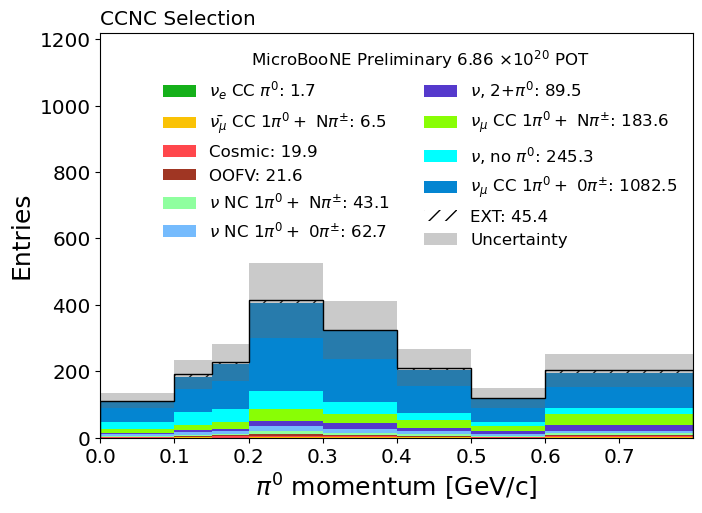

In [16]:
VARIABLE, BINS, RANGE, XTIT = 'n_tracks_contained',5,(-0.5,4.5),r"contained tracks"
VARIABLE, BINS, RANGE, XTIT = 'pi0momanglecos',10,(-1,1),"cosine pi0 theta"
VARIABLE, BINS, RANGE, XTIT = 'pi0energygev',20,(0.1,3),"pi0 energy [GeV]"
VARIABLE, BINS, RANGE, XTIT = 'pi0momentum',20,(0.0,0.8),"pi0 momentum [GeV]"
#VARIABLE, BINS, RANGE, XTIT = 'shortest_dist_pi0_candidate_shrs',25,(0,100),"closest distance"
VARIABLE, XTIT, BINS = 'pi0momentum',  '$\pi^0$ momentum [GeV/c]',np.array([0.0,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.799])
#VARIABLE, XTIT, BINS = 'pi0momanglecos','$\cos\\theta_{\pi^0}$',np.array([-1.,-0.50,-0.25,0.0,0.25,0.5,0.75,1.0]) #np.array([-1.,-0.50,-0.25,0.0,0.25,0.5,0.63, 0.765,0.865,0.935,1.0]) #np.array([-1.,-0.50,-0.25,0.0,0.25,0.5,0.75,1.0])
#VARIABLE, BINS, RANGE, XTIT = 'distance_mid_p1',50,(0,100),"intersection point distance shr 1"
#VARIABLE, BINS, RANGE, XTIT = 'distance_mid_p2',50,(0,100),"intersection point distance shr 2"
#VARIABLE, BINS, RANGE, XTIT = 'pi0_radlen1',50,(0,100),"leading $\gamma$ shower conversion distance [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'shortest_dist_pi0_candidate_shrs',50,(0,100),"closest distance"
#VARIABLE, BINS, RANGE, XTIT = 'distance_intersec_p1',25,(0,50),"intersection point1 distance shr 1"
#VARIABLE, BINS, RANGE, XTIT = 'distance_intersec_p2',25,(0,50),"intersection point2 distance shr 2"
#VARIABLE, BINS, RANGE, XTIT = 'shr2_score',20,(0,0.5), r"shr 2 score"
#VARIABLE, BINS, RANGE, XTIT = 'backwards',2,(0.0,2.0)," bkg is backwards "

fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
    VARIABLE,   
    query= QUERY_CC, #+ " and " + ACCEPTANCE, #+ " and not " + ACCEPTANCE, #QUERY_CERATI, #QUERY_exiting, #QUERY_CONTAINED_50, #QUERY_, #QUERY_1,
    kind="ccncpi0_category",
    #kind="paper_category_xsec",
    #kind="interaction",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",#'cov_matrix_Enu_reco_1eNp.txt',
    #genieweight = "weightSpline",
    ratio=False,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=None,
    chisq=False,
    #asymErrs=True
)[0:3]

#print('%s %.4f %.4f %.4f' % (VARIABLE, plotter_runbyrun[run].stats['pvaluestatonly'], plotter_runbyrun[run].stats['pvaluediag'], plotter_runbyrun[run].stats['pvalue']))


#ax1.set_title(TITLE, loc='left')
#ax1.set_ylim(0, ax1.get_ylim()[1]*2.0)
#ax1.set_xlim(0., 40)
#ax1.set_yscale('log')

#plt.tight_layout()

# fix position of chi2 wrt legend
#plt.draw()
#ax1.vlines(x=135.0, ymin = 0.0, ymax = 800.0, colors='r')
#formatting can be improved..
TITLE = "CCNC Selection"
ax1.set_ylim(0, ax1.get_ylim()[1]*2.2)
ax1.set_title(TITLE, loc='left')
'''legleft = (ax1.get_legend().get_window_extent().x0 < 100)
if legleft:
    for a in ax1.get_children(): 
        if len(a.findobj(match=plt.Text))==0: continue
        txt = a.findobj(match=plt.Text)[0]
        if 'n.d.f.' not in txt.get_text(): continue
        #print(txt.get_text())
        txt.set_x(0.80)'''
# END - fix position of chi2 wrt legend

#fig.show()
#save_path = ls.plots_path

print(plotter_runbyrun[run].prediction)
#print(plotter_runbyrun[run].data)

In [17]:
#define some useful tools

from matplotlib.lines import Line2D

def Pur(my_plotter,VARIABLE,QUERY,ACCEPTANCE,BINS):
    fig, ax1, stack, labls, exty = my_plotter.plot_variable(
        VARIABLE,   
        query=QUERY,
        kind="ccncpi0_category",
        draw_sys=False,
        stacksort=3,
        title="my_xaxis",
        bins=BINS,
        range=None,
        detsysdict={'mc':False,'nue':False,'ccpi0':False,'ncpi0':False,'dirt':False,'ncnopi':False,'nccpi':False,'ncpi0':False,'ccpi0':False},
        DETSYSPATH=DETSYSPATH,
        COVMATRIX="",#'cov_matrix_Enu_reco_1eNp.txt',
        ratio=False,
        chisq=False,
    )
    plt.close(fig)
    den = stack[0][-1]+exty
    fig, ax1, stack, labls, exty = my_plotter.plot_variable(
        VARIABLE,   
        query=QUERY+' and '+ACCEPTANCE,
        kind="ccncpi0_category",
        draw_sys=False,
        stacksort=3,
        title="my_xaxis",
        bins=BINS,
        range=None,
        detsysdict={'mc':False,'nue':False,'ccpi0':False,'ncpi0':False,'dirt':False,'ncnopi':False,'nccpi':False,'ncpi0':False,'ccpi0':False},
        DETSYSPATH=DETSYSPATH,
        COVMATRIX="",#'cov_matrix_Enu_reco_1eNp.txt',
        ratio=False,
        chisq=False,
    )
    plt.close(fig)
    num = stack[0]
    if num.ndim > 1: num = num[-1]
    return num/den

def Eff(df,var,query,acceptance,bin_edges,absval=False):
    #print acceptance
    bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
    bins = []
    bin_eff = []
    bin_err = []
    for i in range(len(bin_centers)):
        binmin = bin_edges[i]
        binmax = bin_edges[i+1]
        bincut = '%s > %f and %s < %f'%(var,binmin,var,binmax)
        if (absval == True):
            bincut = '(%s > %f and %s < %f) or (%s > -%f and %s < -%f)'%(var,binmin,var,binmax,var,binmax,var,binmin)
        if (acceptance != ''): bincut += ' and %s'%acceptance
        #print bincut
        df_tmp =  df.query(bincut) # cut on bin range for desired var.
        df_sub = df_tmp.query(query) #+ ' and ccnc==0') # apply constrain 
        if (df_tmp.shape[0] == 0): continue
        eff = df_sub.shape[0] / float( df_tmp.shape[0] )
        err = np.sqrt( eff*(1-eff)/df_tmp.shape[0] )
        bin_eff.append( eff )
        bin_err.append( err )
        bins.append(bin_centers[i])
        #print 'eff = %.02f @ bin = %.02f'%(eff,bin_centers[i])
    return np.array(bins),np.array(bin_eff),np.array(bin_err)

def Eff_NC(df,var,query,acceptance,bin_edges,absval=False):
    #print acceptance
    bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
    bins = []
    bin_eff = []
    bin_err = []
    for i in range(len(bin_centers)):
        binmin = bin_edges[i]
        binmax = bin_edges[i+1]
        bincut = '%s > %f and %s < %f'%(var,binmin,var,binmax)
        if (absval == True):
            bincut = '(%s > %f and %s < %f) or (%s > -%f and %s < -%f)'%(var,binmin,var,binmax,var,binmax,var,binmin)
        if (acceptance != ''): bincut += ' and %s'%acceptance
        #print bincut
        df_tmp =  df.query(bincut) # cut on bin range for desired var.
        df_sub = df_tmp.query(query) #+ ' and ccnc==1') # apply constrain 
        if (df_tmp.shape[0] == 0): continue
        eff = df_sub.shape[0] / float( df_tmp.shape[0] )
        err = np.sqrt( eff*(1-eff)/df_tmp.shape[0] )
        bin_eff.append( eff )
        bin_err.append( err )
        bins.append(bin_centers[i])
        #print 'eff = %.02f @ bin = %.02f'%(eff,bin_centers[i])
    return np.array(bins),np.array(bin_eff),np.array(bin_err)

ACCEPTANCE_CCNC = 'isVtxFiducial_fixed == 1 and npi0 == 1 and npion == 0' #and ccnc==0 and nu_pdg==14'

def rel_Eff(df,var,query_CCNC, query_NC,acceptance,bin_edges,absval=False):
    #print acceptance
    bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
    bins = []
    bin_rel_eff = []
    bin_eff = []
    for i in range(len(bin_centers)):
        binmin = bin_edges[i]
        binmax = bin_edges[i+1]
        bincut = '%s > %f and %s < %f'%(var,binmin,var,binmax)
        if (absval == True):
            bincut = '(%s > %f and %s < %f) or (%s > -%f and %s < -%f)'%(var,binmin,var,binmax,var,binmax,var,binmin)
        if (acceptance != ''): bincut += ' and %s'%acceptance
        #print bincut
        df_tmp =  df.query(bincut) # cut on bin range for desired var.
        df_sub = df_tmp.query(query_CCNC) # apply constrain 
        df_f_CC = df_tmp.query(query_NC) #(query_CC)
        if (df_tmp.shape[0] == 0): continue
        eff = df_sub.shape[0] / float( df_tmp.shape[0] )
        rel_Eff = df_f_CC.shape[0] / df_sub.shape[0]
        #err = np.sqrt( eff*(1-eff)/df_tmp.shape[0] )
        bin_eff.append( eff )
        bin_rel_eff.append(rel_Eff)
        #bin_err.append( err )
        bins.append(bin_centers[i])
        #print 'eff = %.02f @ bin = %.02f'%(eff,bin_centers[i])
    return np.array(bins),np.array(bin_eff), np.array(bin_rel_eff)



from scipy.optimize import curve_fit
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

def rel_f(my_plotter,VARIABLE,QUERY_CCNC,QUERY_CC,ACCEPTANCE,BINS):
    fig, ax1, stack, labls, exty = my_plotter.plot_variable(
        VARIABLE,   
        query=QUERY_CCNC, #+ " and " + ACCEPTANCE,
        kind="ccncpi0_category",
        draw_sys=False,
        stacksort=3,
        title="my_xaxis",
        bins=BINS,
        range=None,
        detsysdict={'mc':False,'nue':False,'ccpi0':False,'ncpi0':False,'dirt':False,'ncnopi':False,'nccpi':False,'ncpi0':False,'ccpi0':False},
        DETSYSPATH=DETSYSPATH,
        COVMATRIX="",#'cov_matrix_Enu_reco_1eNp.txt',
        ratio=False,
        chisq=False,
    )
    plt.close(fig)
    den = (stack[0][-1] - stack[0][-2]) + ( stack[0][-4] - stack[0][-5]) #stack[0][-1] - stack[0][-2]
    fig, ax1, stack, labls, exty = my_plotter.plot_variable(
        VARIABLE,   
        query=QUERY_CC, #+' and '+ACCEPTANCE,
        kind="ccncpi0_category",
        draw_sys=False,
        stacksort=3,
        title="my_xaxis",
        bins=BINS,
        range=None,
        detsysdict={'mc':False,'nue':False,'ccpi0':False,'ncpi0':False,'dirt':False,'ncnopi':False,'nccpi':False,'ncpi0':False,'ccpi0':False},
        DETSYSPATH=DETSYSPATH,
        COVMATRIX="",#'cov_matrix_Enu_reco_1eNp.txt',
        ratio=False,
        chisq=False,
    )
    
    plt.close(fig)
    num = (stack[0][-1] - stack[0][-2]) + (stack[0][-3] - stack[0][-4]) #stack[0]
    if num.ndim > 1: num = num[-1]
    return num/den, 1 - num/den

In [29]:
from unblinding_far_sideband import *

ACCEPTANCE = 'isVtxFiducial_fixed == 1 and npi0 == 1 and npion == 0'
ACCEPTANCE_CC = 'isVtxFiducial_fixed == 1 and npi0 == 1 and npion == 0 and ccnc==0'
ACCEPTANCE_NC = 'isVtxFiducial_fixed == 1 and npi0 == 1 and npion == 0 and ccnc==1' # and nu_pdg==14'


VARR, VART, labl, bin_edges = 'pi0momentum', 'leadPi0_p', '$\pi^0$ momentum [GeV]', np.array([0.0,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.799])
VARR, VART, labl, bin_edges = 'pi0momanglecos', 'leadPi0_uz', '$\cos\\theta_{\pi^0}$', np.array([-1.,-0.50,-0.25,0.0,0.25,0.5,0.75,1.0])

cc_name = "ccpi0"
nc_name = "ncpi0"
cc = samples[cc_name]
nc = samples[nc_name]
potw_cc = plotter_runbyrun[run].weights[cc_name]
print(potw_cc)
potw_nc = plotter_runbyrun[run].weights[nc_name]
print(potw_nc)
cc["pot"] = potw_cc
nc["pot"] = potw_nc
nue = pd.concat([cc, nc])
#potw = plotter_runbyrun[run].weights[nue]
#w1 = nue.query(ACCEPTANCE)['weightSplineTimesTune']*potw

0.06922300706357215
0.04931703810208483


xx [0.098 0.099 0.099 0.107 0.116 0.134 0.142]


/Users/meghna-local/miniforge3/envs/python3LEE_fresh/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


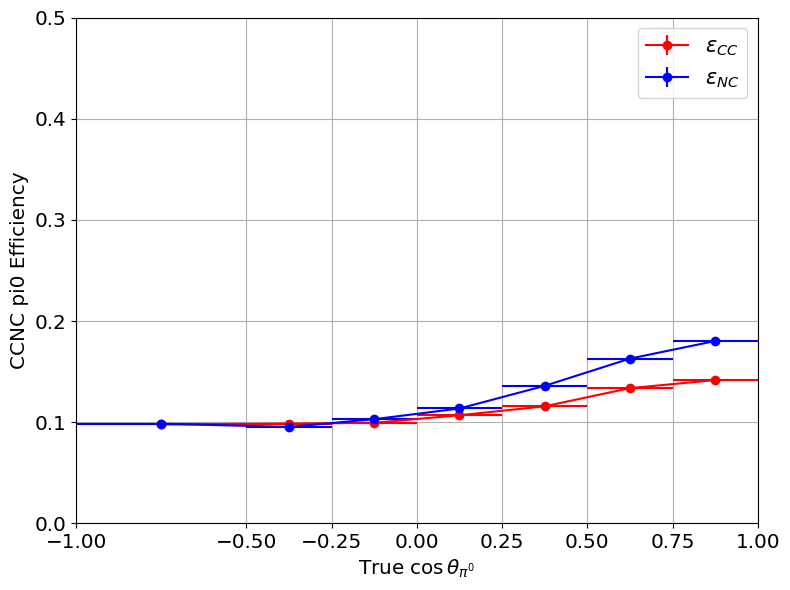

In [30]:
dist = nue[VART]  #true distribution, no selection
n, bins = np.histogram(dist,bins=bin_edges)
n = n/len(dist)

fig, ax = plt.subplots(figsize=(8,6))
fmt = 'o-'
centers,vals,err = Eff(nue,VART,QUERY_CCNC,ACCEPTANCE_CC,bin_edges)
cen, val, er = Eff_NC(nue, VART, QUERY_CCNC, ACCEPTANCE_NC, bin_edges)
ax.errorbar(centers,vals,yerr=err, xerr=(bin_edges[:-1]-bin_edges[1:])/2,fmt=fmt,label= "$\epsilon_{CC}$", color = "red")
ax.errorbar(cen,val,yerr=er, xerr=(bin_edges[:-1]-bin_edges[1:])/2,fmt=fmt,label= "$\epsilon_{NC}$", color = "blue")
print('xx',vals)
ax.set_xlabel('True' + ' ' + labl)
ax.set_ylabel(r'CCNC pi0 Efficiency')
ax.set_xticks(bin_edges)
ax.set_ylim(0.,0.5)
ax.set_xlim(bin_edges[0],bin_edges[-1])
ax.legend(ncol=1, prop={'size': 15})
ax.grid(True)
plt.tight_layout()
fig.show()

xx [0.077 0.088 0.116 0.144 0.184 0.202 0.195 0.133]


/Users/meghna-local/miniforge3/envs/python3LEE_fresh/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


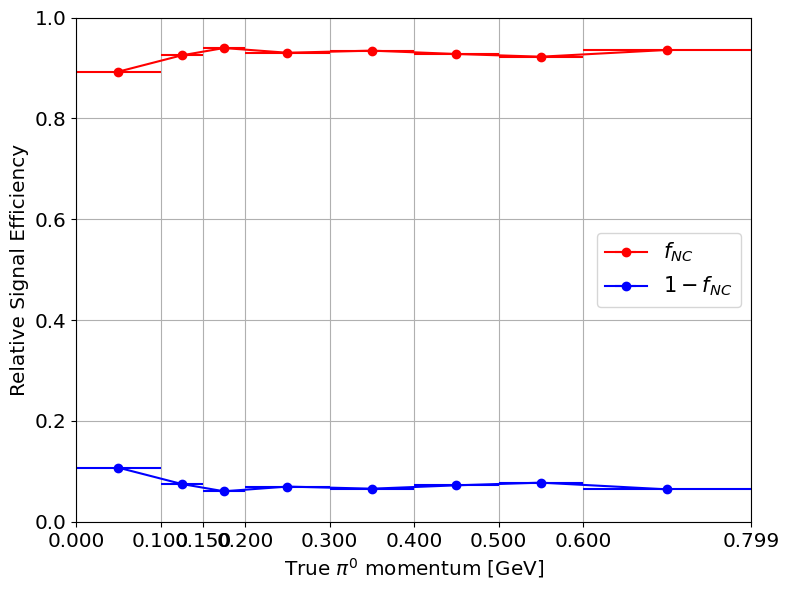

In [37]:
VARR, VART, labl, bin_edges = 'pi0momentum', 'leadPi0_p', '$\pi^0$ momentum [GeV]', np.array([0.0,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.799])

dist = nue[VART]  #true distribution, no selection
n, bins = np.histogram(dist,bins=bin_edges)
n = n/len(dist)

fig, ax = plt.subplots(figsize=(8,6))
fmt = 'o-'
centers,vals,vals_eff = rel_Eff(nue,VART,QUERY_CCNC,QUERY_NC,ACCEPTANCE_NC,bin_edges)
ax.errorbar(centers,vals_eff,xerr=(bin_edges[:-1]-bin_edges[1:])/2,fmt=fmt,label= "$f_{NC}$", color = "red")
ax.errorbar(centers,1 - vals_eff,xerr=(bin_edges[:-1]-bin_edges[1:])/2,fmt=fmt,label= "$1 - f_{NC}$", color = "blue")
print('xx',vals)
ax.set_xlabel('True' + ' ' + labl)
ax.set_ylabel(r'Relative Signal Efficiency')
ax.set_xticks(bin_edges)
ax.set_ylim(0.,1.0)
ax.set_xlim(bin_edges[0],bin_edges[-1])
ax.legend(ncol=1, prop={'size': 15})
ax.grid(True)
plt.tight_layout()
fig.show()

In [32]:
from matplotlib import gridspec
def ccnc_plot_withratio(df,var,queries,acceptance, bin_edges, colors,labels,title,rylab="", absval= False):

        
        if rylab=="": rylab=labels[1]+' / '+labels[0]

        plt.figure(figsize=(6, 6))
        gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
        ax1 = plt.subplot(gs[0])

        bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
        '''
        bins = []
        bin_ = []
        for i in range(len(bin_centers)):
            binmin = bin_edges[i]
            binmax = bin_edges[i+1]
            bincut = '%s > %f and %s < %f'%(var,binmin,var,binmax)
            if (absval == True):
                bincut = '(%s > %f and %s < %f) or (%s > -%f and %s < -%f)'%(var,binmin,var,binmax,var,binmax,var,binmin)
            if (acceptance != ''): bincut += ' and %s'%acceptance
            #print bincut
            df_tmp =  [df.query(bincut + ' and '+Q) for Q in queries] # cut on bin range for desired var.
            bins.append(bin_centers[i])
            bin_.append(df_tmp.shape[0])
          '''
        vals = [df.query(acceptance+' and '+Q)['%s'%var] for Q in queries]
        whgs = [df.query(acceptance+' and '+Q)['weightSplineTimesTune']*df.query(acceptance+' and '+Q)['pot'] for Q in queries]
        #print(bin_)
        n, b, p = plt.hist(vals, bins=bin_edges, weights= whgs,
                           histtype='step',linestyle='solid',color=colors, linewidth=1.2,
                           stacked=False, label=labels)
        plt.title(title)
        #ax1.set_ylabel('selected events ('+str(self.get_dataPOT())+' POT)')
        ax1.legend(loc=2)
        #if v2d['varT'] == 'pi0_e': plt.legend(loc=1)

        ratio = n[1] / n[0]

        ax2 = plt.subplot(gs[1])
        #ax2.set_xlabel(v2d['labelT'])
        ax2.set_ylabel(rylab)
        bincenters = 0.5 * (b[1:] + b[:-1])
        bin_size = [(b[i + 1] - b[i]) / 2 for i in range(len(b) - 1)]
        ax2.errorbar(bincenters, ratio, xerr=bin_size, fmt="rs")#ratio_error
        ax2.set_ylim(0.2, 0.8)
        ax2.grid(True)

        return ratio

trueratio = [0.485 0.51  0.528 0.533 0.523 0.532 0.564]


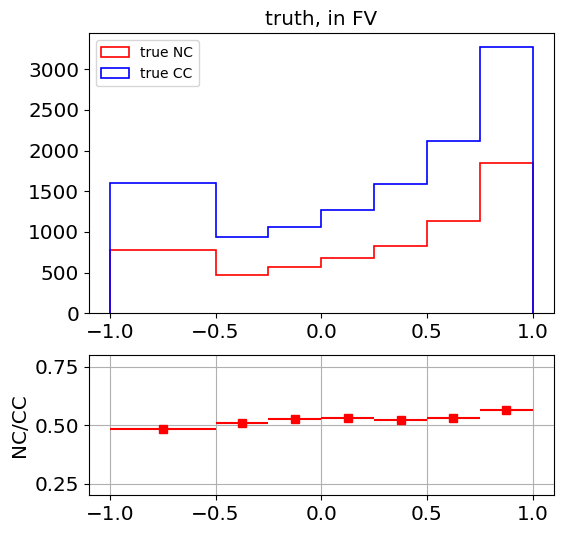

In [33]:
VARR, VART, labl, bin_edges = 'pi0momentum', 'leadPi0_p', 'pi0 momentum [GeV]', np.array([0.0,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.799])
VARR, VART, labl, bin_edges = 'pi0momanglecos', 'leadPi0_uz', '$\cos\\theta_{\pi^0}$', np.array([-1.,-0.50,-0.25,0.0,0.25,0.5,0.75,1.0])

queries = ['ccnc==0','ccnc==1']
trueratio = ccnc_plot_withratio(nue,VART,queries, ACCEPTANCE, bin_edges,\
                                                    colors=['b','r'],labels=['true CC','true NC'],\
                                                    title='truth, in FV',rylab='NC/CC')
print("trueratio =", trueratio)

In [34]:
def ccnc_plot_withr(df,var,queries,acceptance, bin_edges, colors,labels,title,rylab="", absval= False):

        
        if rylab=="": rylab=labels[1]+' / '+labels[0]

        plt.figure(figsize=(6, 6))
        #gs = gridspec.GridSpec(1, 1)
        #ax1 = plt.subplot(gs[0])

        bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
        '''
        bins = []
        bin_ = []
        for i in range(len(bin_centers)):
            binmin = bin_edges[i]
            binmax = bin_edges[i+1]
            bincut = '%s > %f and %s < %f'%(var,binmin,var,binmax)
            if (absval == True):
                bincut = '(%s > %f and %s < %f) or (%s > -%f and %s < -%f)'%(var,binmin,var,binmax,var,binmax,var,binmin)
            if (acceptance != ''): bincut += ' and %s'%acceptance
            #print bincut
            df_tmp =  [df.query(bincut + ' and '+Q) for Q in queries] # cut on bin range for desired var.
            bins.append(bin_centers[i])
            bin_.append(df_tmp.shape[0])
          '''
        vals = [df.query(acceptance+' and '+Q)['%s'%var] for Q in queries]
        whgs = [df.query(acceptance+' and '+Q)['weightSplineTimesTune']*df.query(acceptance+' and '+Q)['pot'] for Q in queries]
        #print(bin_)
        n, b, p = plt.hist(vals, bins=bin_edges, weights= whgs,
                           histtype='step',linestyle='solid',color=colors, linewidth=1.2,
                           stacked=False, label=labels)
        plt.title(title)
        plt.ylabel('selected events $6.86 \\times 10^{20}$ POT')
        plt.legend(loc="upper right")
        #if v2d['varT'] == 'pi0_e': plt.legend(loc=1)

        #ratio = n[1] / n[0]

        #ax2 = plt.subplot(gs[1])
        plt.xlabel("Reconstructed " + labl)
        #ax2.set_ylabel(rylab)
        #bincenters = 0.5 * (b[1:] + b[:-1])
        #bin_size = [(b[i + 1] - b[i]) / 2 for i in range(len(b) - 1)]
        #ax2.errorbar(bincenters, ratio, xerr=bin_size, fmt="rs")#ratio_error
        #ax2.set_ylim(0.2, 0.8)
        #ax2.grid(True)

        return n,b,p

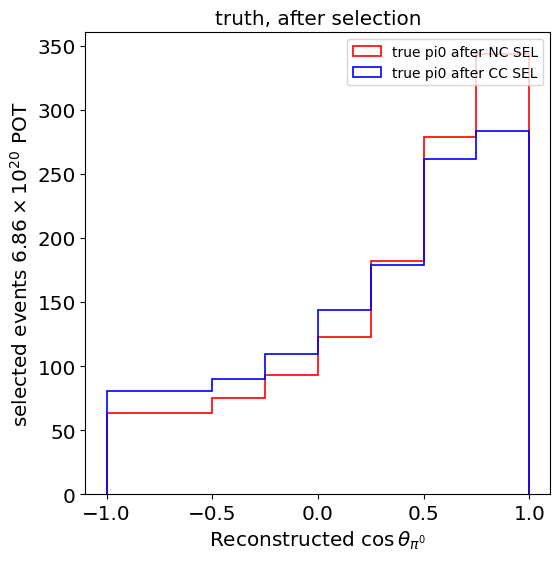

In [35]:
VARR, VART, labl, bin_edges = 'pi0momentum', 'leadPi0_p', 'pi0 momentum [GeV]', np.array([0.0,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.799])
VARR, VART, labl, bin_edges = 'pi0momanglecos', 'leadPi0_uz', '$\cos\\theta_{\pi^0}$', np.array([-1.,-0.50,-0.25,0.0,0.25,0.5,0.75,1.0])

queries = [QUERY_CC, QUERY_NC] #['ccnc==0','ccnc==1']
n,b,p = ccnc_plot_withr(nue,VARR,queries, ACCEPTANCE, bin_edges,\
                                                    colors=['b','r'],labels=['true pi0 after CC SEL','true pi0 after NC SEL'],\
                                                    title='truth, after selection',rylab='NC/CC')


In [26]:
def smearing_matrix(self,variable,sel,title):
        v2d = var2dict[variable]

        fig = plt.figure(figsize=(4, 4))
        x = self.pi0s.query(sel)[v2d['varT']]
        y = self.pi0s.query(sel)[v2d['varR']]
        h2d = plt.hist2d(x, y, bins=v2d['bin_edges'])
        plt.xlabel(v2d['labelT'])
        plt.ylabel(v2d['labelR'])
        plt.colorbar()
        plt.show()

        plt.figure(figsize=(6, 6))
        sm = h2d[0]
        sm = sm / sm.sum(axis=0)
        plt.imshow(sm,origin='lower')
        for i in range(len(sm[0])):
            for j in range(len(sm[0])):
                text = plt.text(j, i, "%.2f"%sm[i, j],ha="center", va="center", color="w")
        plt.title(title)
        plt.ylabel("true bin")
        plt.xlabel("reco bin")
        plt.colorbar()

        return sm

/Users/meghna-local/miniforge3/envs/python3LEE_fresh/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


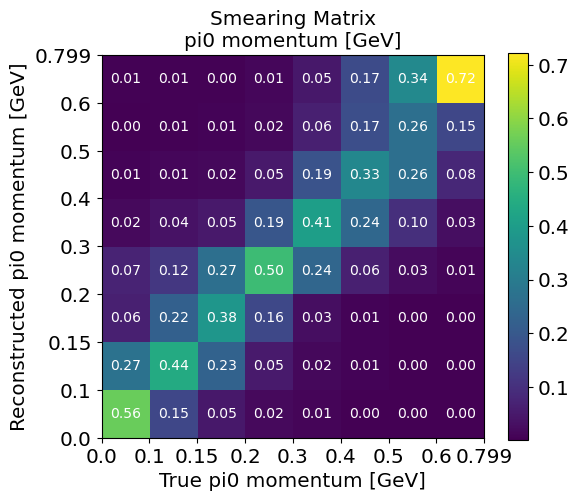

In [40]:
VARR, VART, labl, bin_edges = 'pi0momentum', 'leadPi0_p', 'pi0 momentum [GeV]', np.array([0.0,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.799])
#VARR, VART, labl, bin_edges = 'pi0momanglecos', 'leadPi0_uz', '$\cos\\theta_{\pi^0}$', np.array([-1.,-0.50,-0.25,0.0,0.25,0.5,0.75,1.0])

x = nue.query(ACCEPTANCE+' and '+QUERY_NC)[VARR]
y = nue.query(ACCEPTANCE+' and '+QUERY_NC)[VART]
w = nue.query(ACCEPTANCE+' and '+QUERY_NC)['weightSplineTimesTune']*nue.query(ACCEPTANCE+' and '+QUERY_NC)['pot']
h2d = np.histogram2d(x,y,weights=w,bins=[bin_edges,bin_edges])

fig = plt.figure(figsize=(6, 6))
sm = h2d[0]
#print(sm)
sm = sm / sm.sum(axis=0)
#print(sm)
#print(sm.sum(axis=0))
#print(sm.sum(axis=1))
plt.imshow(sm,origin='lower')
for i in range(len(sm[0])):
    for j in range(len(sm[0])):
        text = plt.text(j, i, "%.2f"%sm[i, j],ha="center", va="center", color="w")
plt.title('Smearing Matrix\n'+labl)
plt.ylabel("Reconstructed "+labl)
plt.xlabel("True "+labl)
plt.xticks(ticks=np.linspace(-0.5,len(bin_edges)-1.5,len(bin_edges)),labels=bin_edges)
plt.yticks(ticks=np.linspace(-0.5,len(bin_edges)-1.5,len(bin_edges)),labels=bin_edges)
#plt.colorbar()
plt.colorbar(shrink = 0.69)
plt.tight_layout()
fig.show()

In [44]:
VARR, VART, labl, bin_edges = 'pi0momanglecos', 'leadPi0_uz', '$\cos\\theta_{\pi^0}$', np.array([-1.,-0.50,-0.25,0.0,0.25,0.5,0.75,1.0])

fcov_ccnc = plotter_runbyrun[run].sys_err_FINAL("weightsFlux", VARR, queries, None, bin_edges, "weightSplineTimesTune",maxUniv=True)
print('flux\n',fcov_ccnc)


flux
 [[ 280.534  301.12   392.237  510.977  674.607 1092.214 1363.028  242.54
   240.68   331.392  438.884  670.64  1064.671 1448.232]
 [ 301.12   325.996  424.573  549.018  724.498 1171.664 1455.015  262.134
   261.36   359.495  475.248  724.553 1147.4   1551.818]
 [ 392.237  424.573  563.05   711.465  940.3   1524.164 1900.504  349.556
   341.52   475.288  626.05   952.549 1506.568 2025.332]
 [ 510.977  549.018  711.465  936.717 1231.696 1993.837 2480.182  437.407
   439.935  601.63   797.856 1220.114 1936.346 2637.615]
 [ 674.607  724.498  940.3   1231.696 1628.757 2635.646 3290.894  578.754
   577.67   792.851 1052.112 1608.352 2557.005 3488.559]
 [1092.214 1171.664 1524.164 1993.837 2635.646 4293.322 5388.383  941.61
   930.392 1282.327 1701.824 2607.326 4149.445 5679.572]
 [1363.028 1455.015 1900.504 2480.182 3290.894 5388.383 6837.444 1180.21
  1147.519 1591.635 2115.683 3250.161 5187.939 7146.815]
 [ 242.54   262.134  349.556  437.407  578.754  941.61  1180.21   221.707
   210

In [45]:
correlation_matrix_CCNC = np.zeros(fcov_ccnc.shape)

for i in range(fcov_ccnc.shape[0]):
    for j in range(fcov_ccnc.shape[1]):
            correlation_matrix_CCNC[i][j] = fcov_ccnc[i][j] / np.sqrt(fcov_ccnc[i][i] * fcov_ccnc[j][j])
correlation_matrix_CCNC

array([[1.   , 0.996, 0.987, 0.997, 0.998, 0.995, 0.984, 0.973, 0.985,
        0.982, 0.99 , 0.993, 0.996, 0.996],
       [0.996, 1.   , 0.991, 0.994, 0.994, 0.99 , 0.975, 0.975, 0.992,
        0.989, 0.994, 0.995, 0.996, 0.99 ],
       [0.987, 0.991, 1.   , 0.98 , 0.982, 0.98 , 0.969, 0.989, 0.986,
        0.994, 0.996, 0.995, 0.995, 0.983],
       [0.997, 0.994, 0.98 , 1.   , 0.997, 0.994, 0.98 , 0.96 , 0.985,
        0.976, 0.984, 0.988, 0.991, 0.992],
       [0.998, 0.994, 0.982, 0.997, 1.   , 0.997, 0.986, 0.963, 0.981,
        0.975, 0.984, 0.988, 0.993, 0.995],
       [0.995, 0.99 , 0.98 , 0.994, 0.997, 1.   , 0.995, 0.965, 0.973,
        0.972, 0.981, 0.987, 0.992, 0.998],
       [0.984, 0.975, 0.969, 0.98 , 0.986, 0.995, 1.   , 0.959, 0.951,
        0.956, 0.966, 0.974, 0.983, 0.995],
       [0.973, 0.975, 0.989, 0.96 , 0.963, 0.965, 0.959, 1.   , 0.971,
        0.992, 0.989, 0.989, 0.987, 0.973],
       [0.985, 0.992, 0.986, 0.985, 0.981, 0.973, 0.951, 0.971, 1.   ,
        0

/Users/meghna-local/miniforge3/envs/python3LEE_fresh/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


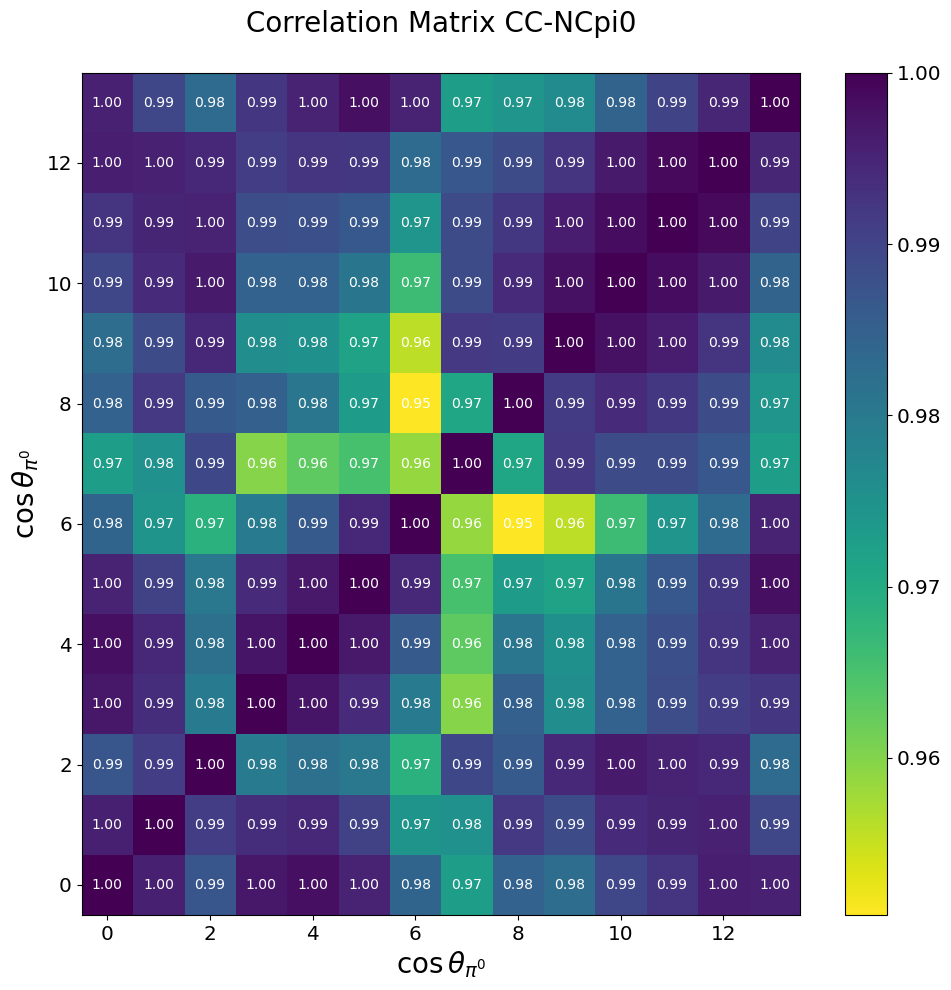

In [46]:
fig = plt.figure(figsize=(10,10))
plt.imshow(correlation_matrix_CCNC,cmap='viridis_r',aspect='auto', origin='lower')
for i in range(len(correlation_matrix_CCNC[0])):
    for j in range(len(correlation_matrix_CCNC[0])):
        text = plt.text(j, i, "%.2f"%correlation_matrix_CCNC[i, j],ha="center", va="center", color="w")
plt.ylabel(labl, fontsize = 20)
plt.xlabel(labl, fontsize = 20)
#plt.xticks(ticks=np.linspace(-0.5,len(NBINS)-1.5,len(NBINS)),labels=NBINS)
#plt.yticks(ticks=np.linspace(-0.5,len(NBINS)-1.5,len(NBINS)),labels=NBINS)
#plt.colorbar(shrink = 0.70)
#plt.tight_layout()
#fig.show()
plt.title('Correlation Matrix CC-NCpi0\n', fontsize = 20)
plt.colorbar()
plt.tight_layout()
fig.show()

In [58]:
VARR, VART, labl, bin_edges = 'pi0momentum', 'leadPi0_p', 'pi0 momentum [GeV]', np.array([0.0,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.799])
VARR, VART, labl, bin_edges = 'pi0momanglecos', 'leadPi0_uz', '$\cos\\theta_{\pi^0}$', np.array([-1.,-0.50,-0.25,0.0,0.25,0.5,0.75,1.0])

run=123
ACCEPTANCE = 'isVtxFiducial_fixed == 1 and npi0 == 1 and npion==0'
queries = [QUERY_CC, QUERY_NC]

gcov_ccnc = plotter_runbyrun[run].sys_err_with_resp_func_FINAL("weightsGenie", VARR, VART, queries, ACCEPTANCE, None, bin_edges, "weightSplineTimesTune", maxUniv=True)
print('genie\n',gcov_ccnc)


genie
 [[  80.762   78.732   87.331  112.426  159.015  203.874  234.911  108.844
   125.93   140.033  183.272  258.748  338.569  397.047]
 [  78.732   81.818   90.894  115.368  166.172  214.859  259.4    106.405
   123.974  139.097  184.187  260.137  344.403  405.926]
 [  87.331   90.894  104.705  132.437  191.002  251.959  313.364  116.896
   136.433  155.523  204.045  289.6    388.243  469.144]
 [ 112.426  115.368  132.437  176.782  249.303  339.142  424.289  151.075
   176.332  205.334  268.397  377.669  515.068  629.11 ]
 [ 159.015  166.172  191.002  249.303  370.375  507.696  637.977  212.297
   249.857  295.581  383.919  542.559  741.205  908.589]
 [ 203.874  214.859  251.959  339.142  507.696  751.043  965.441  270.855
   321.251  394.625  507.609  713.495 1001.383 1271.878]
 [ 234.911  259.4    313.364  424.289  637.977  965.441 1395.956  296.37
   348.296  444.856  586.463  821.377 1205.168 1631.101]
 [ 108.844  106.405  116.896  151.075  212.297  270.855  296.37   154.848
   

In [59]:
correlation_matrix_CCNC = np.zeros(gcov_ccnc.shape)

for i in range(gcov_ccnc.shape[0]):
    for j in range(gcov_ccnc.shape[1]):
            correlation_matrix_CCNC[i][j] = gcov_ccnc[i][j] / np.sqrt(gcov_ccnc[i][i] * gcov_ccnc[j][j])
correlation_matrix_CCNC

array([[1.   , 0.969, 0.95 , 0.941, 0.919, 0.828, 0.7  , 0.973, 0.971,
        0.941, 0.959, 0.964, 0.945, 0.903],
       [0.969, 1.   , 0.982, 0.959, 0.955, 0.867, 0.768, 0.945, 0.949,
        0.929, 0.957, 0.963, 0.955, 0.917],
       [0.95 , 0.982, 1.   , 0.973, 0.97 , 0.898, 0.82 , 0.918, 0.923,
        0.918, 0.937, 0.948, 0.952, 0.937],
       [0.941, 0.959, 0.973, 1.   , 0.974, 0.931, 0.854, 0.913, 0.919,
        0.933, 0.949, 0.951, 0.972, 0.967],
       [0.919, 0.955, 0.97 , 0.974, 1.   , 0.963, 0.887, 0.886, 0.899,
        0.928, 0.938, 0.944, 0.966, 0.965],
       [0.828, 0.867, 0.898, 0.931, 0.963, 1.   , 0.943, 0.794, 0.812,
        0.87 , 0.871, 0.872, 0.917, 0.948],
       [0.7  , 0.768, 0.82 , 0.854, 0.887, 0.943, 1.   , 0.637, 0.646,
        0.719, 0.738, 0.736, 0.809, 0.892],
       [0.973, 0.945, 0.918, 0.913, 0.886, 0.794, 0.637, 1.   , 0.986,
        0.956, 0.975, 0.977, 0.948, 0.891],
       [0.971, 0.949, 0.923, 0.919, 0.899, 0.812, 0.646, 0.986, 1.   ,
        0

/Users/meghna-local/miniforge3/envs/python3LEE_fresh/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


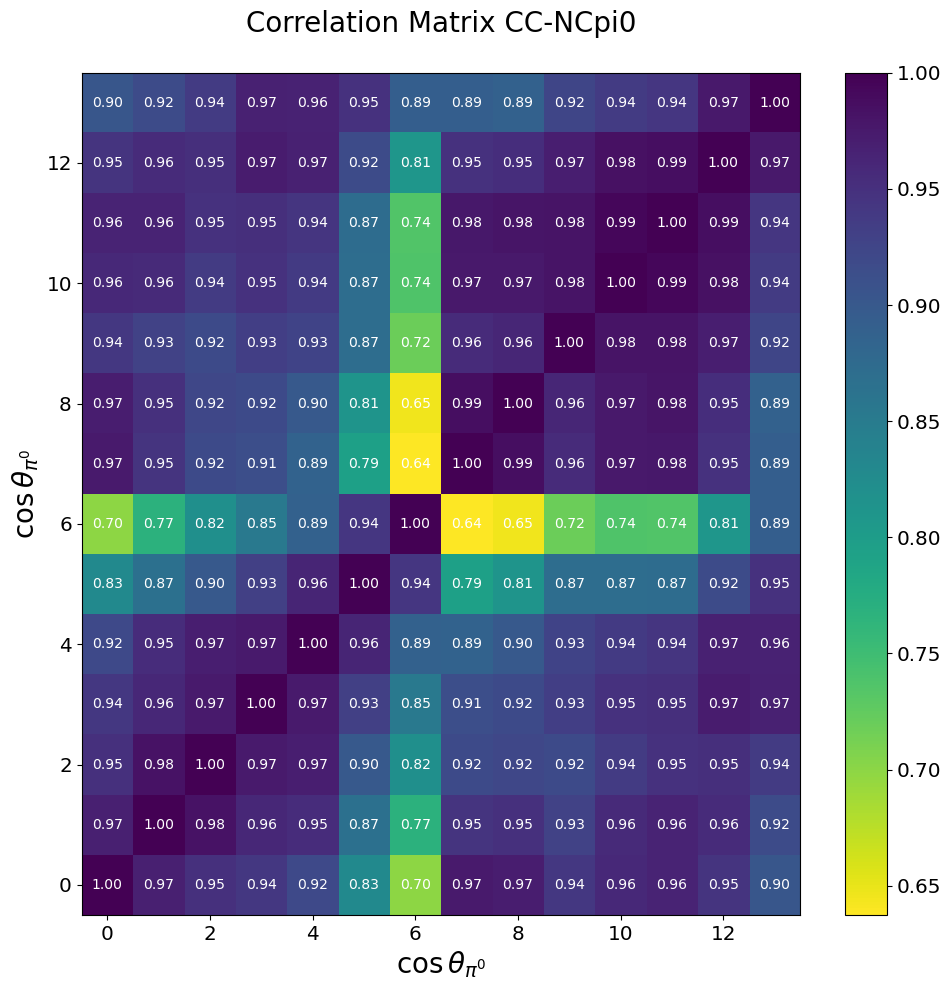

In [60]:
fig = plt.figure(figsize=(10,10))
plt.imshow(correlation_matrix_CCNC,cmap='viridis_r',aspect='auto', origin='lower')
for i in range(len(correlation_matrix_CCNC[0])):
    for j in range(len(correlation_matrix_CCNC[0])):
        text = plt.text(j, i, "%.2f"%correlation_matrix_CCNC[i, j],ha="center", va="center", color="w")
plt.ylabel(labl, fontsize = 20)
plt.xlabel(labl, fontsize = 20)
#plt.xticks(ticks=np.linspace(-0.5,len(NBINS)-1.5,len(NBINS)),labels=NBINS)
#plt.yticks(ticks=np.linspace(-0.5,len(NBINS)-1.5,len(NBINS)),labels=NBINS)
#plt.colorbar(shrink = 0.70)
#plt.tight_layout()
#fig.show()
plt.title('Correlation Matrix CC-NCpi0\n', fontsize = 20)
plt.colorbar()
plt.tight_layout()
fig.show()

In [54]:

VARR, VART, labl, bin_edges = 'pi0momentum', 'leadPi0_p', 'pi0 momentum [GeV]', np.array([0.0,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.799])
VARR, VART, labl, bin_edges = 'pi0momanglecos', 'leadPi0_uz', '$\cos\\theta_{\pi^0}$', np.array([-1.,-0.50,-0.25,0.0,0.25,0.5,0.75,1.0])

run=123
ACCEPTANCE = 'isVtxFiducial_fixed == 1 and npi0 == 1 and npion==0'
queries = [QUERY_CC, QUERY_NC]

cov = plotter_runbyrun[run].sys_err_unisim_with_resp_func_FINAL(VARR,VART, queries, ACCEPTANCE, None, bin_edges)

In [55]:
correlation_matrix_CCNC = np.zeros(cov.shape)

for i in range(cov.shape[0]):
    for j in range(cov.shape[1]):
            correlation_matrix_CCNC[i][j] = cov[i][j] / np.sqrt(cov[i][i] * cov[j][j])
correlation_matrix_CCNC

array([[ 1.   ,  0.997,  0.994,  0.986,  0.996,  0.997, -0.996,  0.999,
         0.968,  0.995,  0.997,  0.997,  0.998, -0.871],
       [ 0.997,  1.   ,  0.987,  0.993,  0.995,  0.996, -0.997,  0.997,
         0.984,  0.998,  0.991,  0.992,  0.996, -0.834],
       [ 0.994,  0.987,  1.   ,  0.982,  0.995,  0.996, -0.992,  0.996,
         0.943,  0.989,  1.   ,  0.999,  0.997, -0.908],
       [ 0.986,  0.993,  0.982,  1.   ,  0.994,  0.995, -0.988,  0.988,
         0.98 ,  0.998,  0.985,  0.986,  0.992, -0.818],
       [ 0.996,  0.995,  0.995,  0.994,  1.   ,  1.   , -0.993,  0.997,
         0.966,  0.997,  0.997,  0.997,  0.999, -0.868],
       [ 0.997,  0.996,  0.996,  0.995,  1.   ,  1.   , -0.995,  0.998,
         0.969,  0.998,  0.997,  0.998,  0.999, -0.866],
       [-0.996, -0.997, -0.992, -0.988, -0.993, -0.995,  1.   , -0.997,
        -0.972, -0.996, -0.995, -0.995, -0.998,  0.857],
       [ 0.999,  0.997,  0.996,  0.988,  0.997,  0.998, -0.997,  1.   ,
         0.966,  0.996,  

/Users/meghna-local/miniforge3/envs/python3LEE_fresh/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


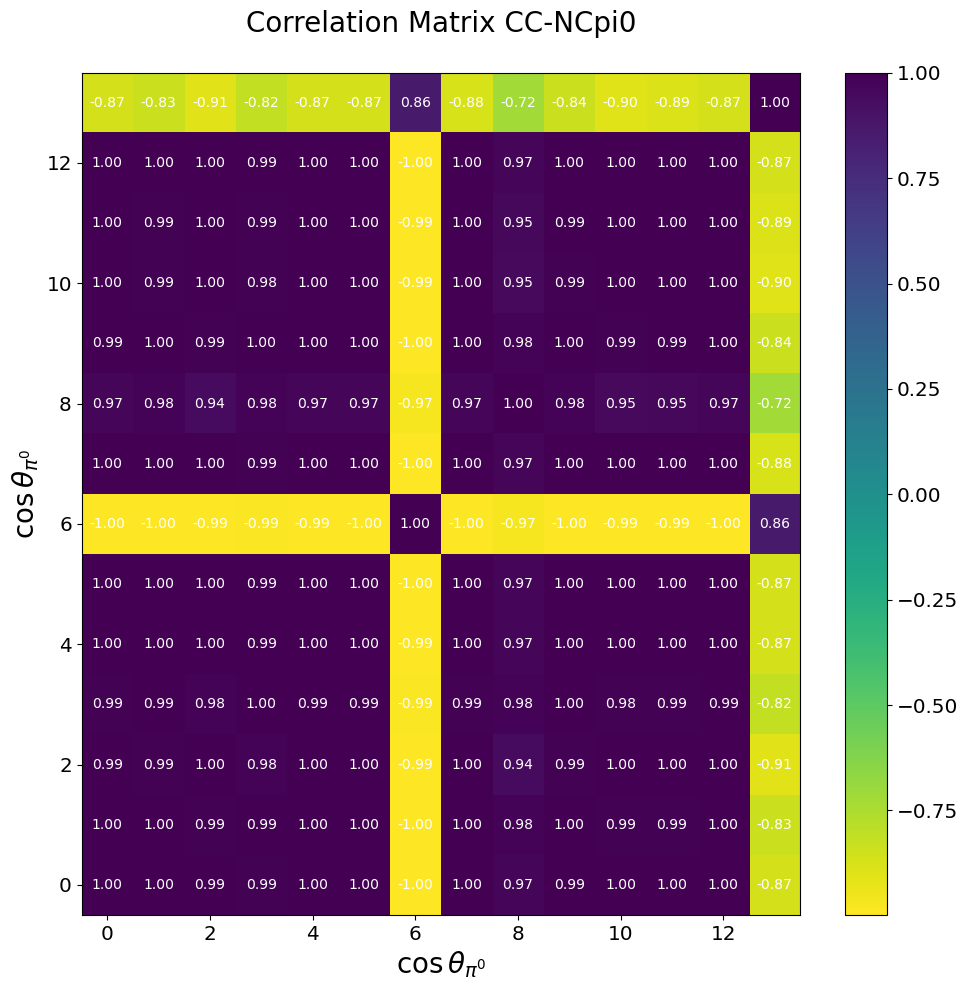

In [57]:
fig = plt.figure(figsize=(10,10))
plt.imshow(correlation_matrix_CCNC,cmap='viridis_r',aspect='auto', origin='lower')
for i in range(len(correlation_matrix_CCNC[0])):
    for j in range(len(correlation_matrix_CCNC[0])):
        text = plt.text(j, i, "%.2f"%correlation_matrix_CCNC[i, j],ha="center", va="center", color="w")
plt.ylabel(labl, fontsize = 20)
plt.xlabel(labl, fontsize = 20)
#plt.xticks(ticks=np.linspace(-0.5,len(NBINS)-1.5,len(NBINS)),labels=NBINS)
#plt.yticks(ticks=np.linspace(-0.5,len(NBINS)-1.5,len(NBINS)),labels=NBINS)
#plt.colorbar(shrink = 0.70)
#plt.tight_layout()
#fig.show()
plt.title('Correlation Matrix CC-NCpi0\n', fontsize = 20)
plt.colorbar()
plt.tight_layout()
fig.show()

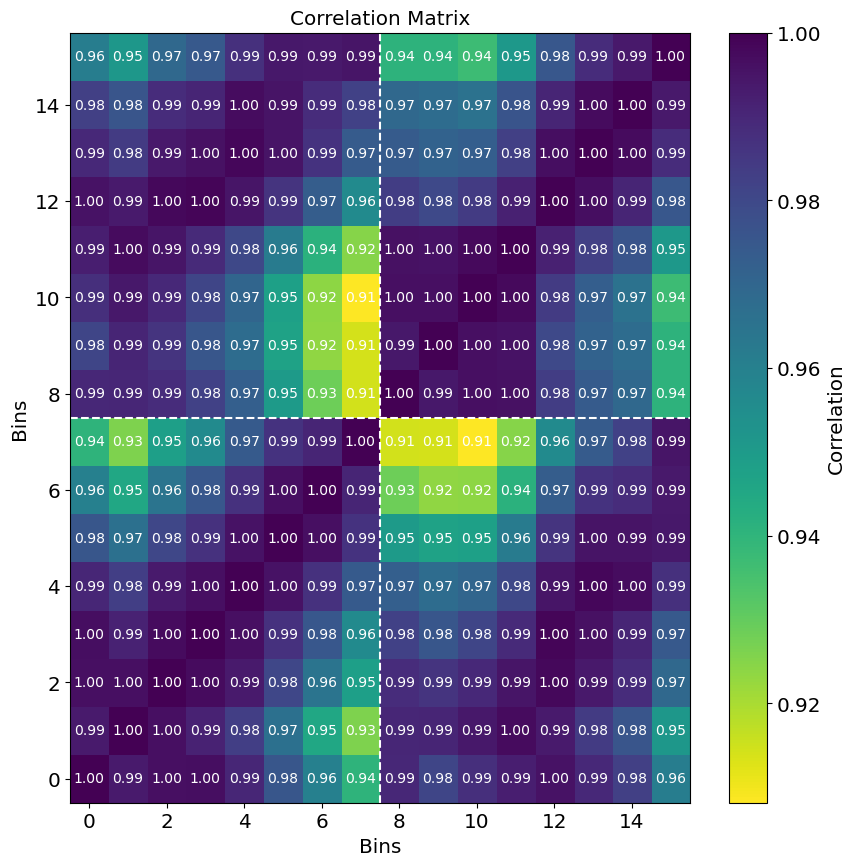

In [36]:
import matplotlib.pyplot as plt

# Assume cov is the 4D covariance array from the previous function
# Shape of cov: (number of queries, number of queries, n_bins, n_bins)

# Combining the covariance matrices into a single 2D matrix
num_queries = len(queries)
n_bins = len(correlation_matrices[0,0])
combined_cov_matrix = np.zeros((num_queries * n_bins, num_queries * n_bins))

for i in range(num_queries):
    for j in range(num_queries):
        start_i, end_i = i * n_bins, (i + 1) * n_bins
        start_j, end_j = j * n_bins, (j + 1) * n_bins
        combined_cov_matrix[start_i:end_i, start_j:end_j] = correlation_matrices[i, j]
        #text = plt.text(j, i, "%.2f"%fcov[i, j],ha="center", va="center", color="w")

# Plotting
plt.figure(figsize=(10, 10))
plt.imshow(combined_cov_matrix,cmap='viridis_r',aspect='auto', origin='lower')
plt.colorbar(label='Correlation')

# Adding text to each cell
for i in range(combined_cov_matrix.shape[0]):
    for j in range(combined_cov_matrix.shape[1]):
        text = plt.text(j, i, "%.2f" % combined_cov_matrix[i, j],
                        ha="center", va="center", color="w")

# Adding labels
plt.xlabel('Bins')
plt.ylabel('Bins')
plt.title('Correlation Matrix')

# Optional: Adding lines to separate different query regions
for i in range(1, num_queries):
    plt.axhline(y=i*n_bins - 0.5, color='white', linestyle='--')
    plt.axvline(x=i*n_bins - 0.5, color='white', linestyle='--')